# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import glob
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import multiprocessing as mp
import cv2
from scipy.signal import resample
import wave
from sklearn.model_selection import train_test_split
import ffmpeg
# import librosa
from pydub import AudioSegment
import io

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

import variables as var

In [3]:
# var.TO_PATH = "/content/drive/MyDrive/Thesis/PREP/sub_data"

In [4]:
# prep_df = pd.read_csv("/content/drive/MyDrive/Thesis/PREP/prepped_df.csv")
prep_df = pd.read_csv("data/SnapUGC/prepped_df.csv")

# remove unused columns
prep_df.drop(columns=["Title", "Description"], inplace=True)

prep_df

prep_df

,Id,Video_len,order of ECR,order of NAWP,Set,ECR,NAWP
0,5902367b4d7d4c38fe4638593ddea7ee,42.400000,0,0,train,0.000000,0.000000
1,9be2d4d5e8d4bfd1f5ce59f51d7d96dd,15.582233,0,0,train,0.000000,0.000000
2,1d5a6586d42b5b0d69f48a7ba87fccfe,18.300000,0,0,train,0.000000,0.000000
3,1e9b26ba367a8ed559916599294bbfc1,45.866667,0,0,train,0.000000,0.000000
4,e86dbca9869239fcf2d04373f9efd38e,29.880000,0,0,train,0.000000,0.000000
...,...,...,...,...,...,...,...
57833,58ec27987a35909f4006f136118c6940,21.033333,34494,131030,test,0.269961,0.999466
57834,26e446b86f92faa89d88a58d03ea24bb,10.700000,47428,131047,test,0.371187,0.999596
57835,72ae9bac4dd52c9e6befc90d9bae710c,12.900000,35188,131086,test,0.275392,0.999893
57836,f548dd1f4b64e5ca3f2c7780871a08c5,10.000000,1592,131090,test,0.012459,0.999924


In [5]:
downloaded_videos = os.listdir(var.DOWNLOAD_PATH + "/train")
downloaded_videos += os.listdir(var.DOWNLOAD_PATH + "/test")
downloaded_videos = [s.removesuffix(".mp4") for s in downloaded_videos]

prep_df = prep_df[prep_df["Id"].isin(downloaded_videos)]
prep_df

,Id,Video_len,order of ECR,order of NAWP,Set,ECR,NAWP
0,5902367b4d7d4c38fe4638593ddea7ee,42.400000,0,0,train,0.000000,0.000000
1,9be2d4d5e8d4bfd1f5ce59f51d7d96dd,15.582233,0,0,train,0.000000,0.000000
2,1d5a6586d42b5b0d69f48a7ba87fccfe,18.300000,0,0,train,0.000000,0.000000
3,1e9b26ba367a8ed559916599294bbfc1,45.866667,0,0,train,0.000000,0.000000
4,e86dbca9869239fcf2d04373f9efd38e,29.880000,0,0,train,0.000000,0.000000
...,...,...,...,...,...,...,...
57833,58ec27987a35909f4006f136118c6940,21.033333,34494,131030,test,0.269961,0.999466
57834,26e446b86f92faa89d88a58d03ea24bb,10.700000,47428,131047,test,0.371187,0.999596
57835,72ae9bac4dd52c9e6befc90d9bae710c,12.900000,35188,131086,test,0.275392,0.999893
57836,f548dd1f4b64e5ca3f2c7780871a08c5,10.000000,1592,131090,test,0.012459,0.999924


In [6]:
# def find_matching_ids(directory):
#     npz_ids = set()
#     wav_ids = set()

#     for file in os.listdir(directory):
#         if file.endswith(".npz"):
#             npz_ids.add(file[:-4])  # Remove .npz
#         elif file.endswith(".wav"):
#             wav_ids.add(file[:-4])  # Remove .wav

#     common_ids = npz_ids & wav_ids  # Find IDs present in both sets
#     return sorted(common_ids)

# existed_ids_train = find_matching_ids(var.TO_PATH + "/train")
# existed_ids_test = find_matching_ids(var.TO_PATH + "/test")

# prep_df = prep_df[prep_df["Id"].isin(existed_ids_train) | prep_df["Id"].isin(existed_ids_test)]
# prep_df.reset_index(drop=True, inplace=True)
# len(prep_df)

In [7]:
prep_df.sample(10)

,Id,Video_len,order of ECR,order of NAWP,Set,ECR,NAWP
12553,459738adc79e1eb8c0ca43a015eb5328,15.100000,25466,23751,train,0.199305,0.181167
41632,715fb5f42367aa9cfc969cf894dc20eb,13.033333,124389,117486,train,0.973508,0.896156
18199,3b0b7f4aff13bd0ae0be0907004b5c35,10.000000,40142,40433,train,0.314164,0.308413
41535,e0e25bcec61e6292353679d59439f9e0,37.933333,115654,117339,train,0.905145,0.895034
52588,4f2e407c738c09763d2cfb011567c847,13.633333,27636,24101,test,0.216288,0.183837
55437,9cc4a2c302194b55d7e65e443483436c,10.500000,75335,99313,test,0.589596,0.757536
32107,2b9d94ca9fdd05c6524695db94112bc8,18.800000,77748,94542,train,0.608481,0.721144
27749,442536ac4a479c7910970385db9de608,13.133333,86917,76809,train,0.680240,0.585881
43379,3288e3d41f2bd3e2c5302fd0dad6d508,50.866667,117071,120289,train,0.916235,0.917536
12780,d9efad0170e373cbe753d89d143ed937,12.866667,17293,24371,train,0.135341,0.185896


# Check distribution

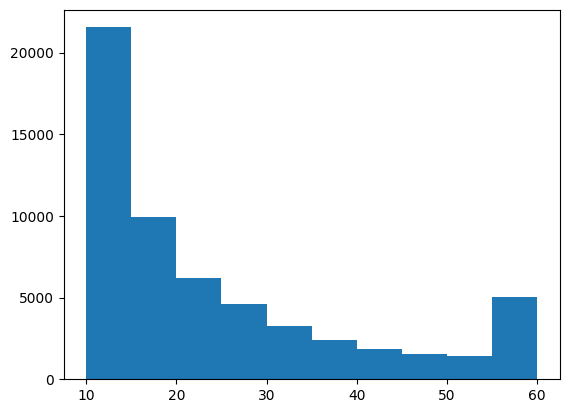

In [8]:
plt.hist(prep_df['Video_len'])
plt.show()

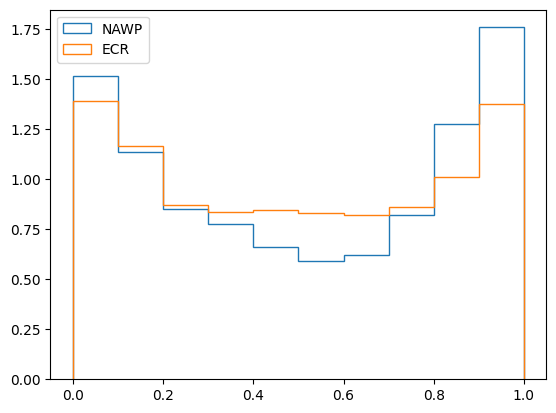

In [9]:
plt.hist(prep_df['NAWP'], density=True, histtype='step', label='NAWP')
plt.hist(prep_df['ECR'], density=True, histtype='step', label='ECR')
plt.legend()
plt.show()

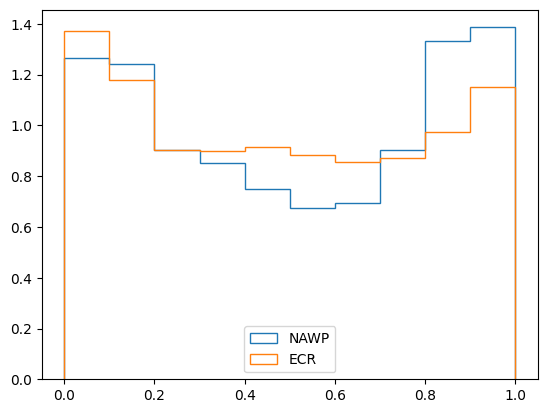

In [10]:
plt.hist(prep_df[prep_df['Video_len'] <= var.MAX_SECONDS]['NAWP'], density=True, histtype='step', label='NAWP')
plt.hist(prep_df[prep_df['Video_len'] <= var.MAX_SECONDS]['ECR'], density=True, histtype='step', label='ECR')
plt.legend()
plt.show()

In [11]:
prep_df = prep_df[prep_df['Video_len'] <= var.MAX_SECONDS]

In [12]:
prep_df['NAWP'].min(), prep_df['NAWP'].max(), prep_df['ECR'].min(), prep_df['ECR'].max()

(np.float64(0.0),
 np.float64(0.9999771167048056),
 np.float64(0.0),
 np.float64(1.0))

# Load data

In [13]:
sample_video = prep_df.sample(1).iloc[0]
sample_video

Id               b7d74f2d8f4e91e5619c5bc11e3bf353
Video_len                               18.833333
order of ECR                                24234
order of NAWP                               21706
Set                                         train
ECR                                      0.189663
NAWP                                     0.165568
Name: 11677, dtype: object

Sample ID: b7d74f2d8f4e91e5619c5bc11e3bf353
Loaded Video Shape: (94, 224, 128, 3)
Loaded Audio Shape: (301674,)


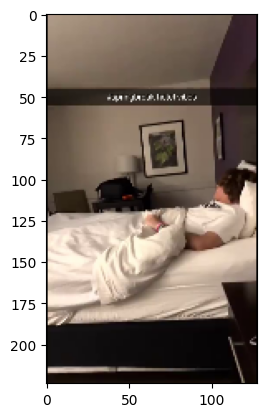

In [14]:
def load_video_audio(video_path, 
                    target_height=var.TARGET_FRAME_SIZE[0], target_width=var.TARGET_FRAME_SIZE[1], target_fps=var.VIDEO_FPS, 
                    target_sample_rate=var.AUDIO_FPS,
                    start=0, end=None):
    """
    Extracts video frames and audio from a video file between start and end seconds, with resizing and downsampling.
    """
    # ---- Extract Video Frames with Fixed FPS ----
    cap = cv2.VideoCapture(video_path)
    original_fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames / original_fps

    if end is None or end > duration:
        end = duration

    start_frame = int(start * original_fps)
    end_frame = int(end * original_fps)
    frame_interval = original_fps / target_fps if target_fps is not None else 1

    frames = []
    frame_idx = 0

    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

    while cap.isOpened():
        current_pos = cap.get(cv2.CAP_PROP_POS_FRAMES)
        if current_pos >= end_frame:
            break

        ret, frame = cap.read()
        if not ret:
            break

        if frame_idx % round(frame_interval) == 0:
            h, w, _ = frame.shape

            # Resize with padding
            scale = min(target_width / w, target_height / h)
            new_w, new_h = int(w * scale), int(h * scale)
            resized_frame = cv2.resize(frame, (new_w, new_h))
            resized_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)

            padded_frame = np.zeros((target_height, target_width, 3), dtype=np.uint8)
            pad_top = (target_height - new_h) // 2
            pad_left = (target_width - new_w) // 2
            padded_frame[pad_top:pad_top+new_h, pad_left:pad_left+new_w] = resized_frame

            frames.append(padded_frame)

        frame_idx += 1

    cap.release()
    video_array = np.array(frames, dtype=np.uint8)

    # ---- Extract and Downsample Audio (Trimmed) ----
    ffmpeg_args = {
        'format': 'wav',
        'ar': target_sample_rate,
        'ac': 1
    }

    input_args = {}
    if start != 0 and end is not None:
        input_args['ss'] = start
        input_args['to'] = end

    out, _ = (
        ffmpeg
        .input(video_path, **input_args)
        .output("pipe:", **ffmpeg_args)
        .run(capture_stdout=True, capture_stderr=True)
    )

    audio = AudioSegment.from_file(io.BytesIO(out), format="wav")
    samples = np.array(audio.get_array_of_samples(), dtype=np.int16)

    return video_array, samples



print(f"Sample ID: {sample_video['Id']}")

video_loaded, audio_loaded = load_video_audio(os.path.join(var.DOWNLOAD_PATH, sample_video['Set'], sample_video['Id'] + ".mp4"),
                                              start=0, end=None)
print(f"Loaded Video Shape: {video_loaded.shape}")  # (num_frames, height, width, 3)
print(f"Loaded Audio Shape: {audio_loaded.shape}")

plt.imshow(video_loaded[0])
plt.show()

# Split scenes

In [15]:
prep_df.reset_index(drop=True, inplace=True)

In [16]:
splitted_df = pd.DataFrame({"Id": [], "Start": [], "End": []})

cur_files = os.listdir(var.SCENE_PATH)
num_csv_files = len(cur_files)

for csv_file in cur_files:
    tmp_df = pd.read_csv(var.SCENE_PATH + "/" + csv_file)
    splitted_df = pd.concat([splitted_df, tmp_df], axis=0)

splitted_df.reset_index(drop=True, inplace=True)
existed_ids = splitted_df['Id'].unique()
print("Existed ids:", len(existed_ids))
splitted_df

Existed ids: 4223


,Id,Start,End
0,9be2d4d5e8d4bfd1f5ce59f51d7d96dd,0.000000,15.582233
1,e86dbca9869239fcf2d04373f9efd38e,0.000000,14.188491
2,e86dbca9869239fcf2d04373f9efd38e,14.188491,29.880000
3,d641d9b30eac02cfcfee786feac8a04c,0.000000,13.680333
4,7f509bf510c87812428b202176ee19db,0.000000,0.834570
...,...,...,...
14018,7384bbfe040fcc87d9cc88c308c82a16,6.566667,12.266667
14019,628540b435bd7400b02fe268ec27187f,0.000000,10.714971
14020,628540b435bd7400b02fe268ec27187f,10.714971,11.957774
14021,628540b435bd7400b02fe268ec27187f,11.957774,16.190019


In [17]:
# only test a sample from prepared scenes
prep_df = prep_df[prep_df['Id'].isin(existed_ids)]
prep_df.reset_index(drop=True, inplace=True)
prep_df

,Id,Video_len,order of ECR,order of NAWP,Set,ECR,NAWP
0,9be2d4d5e8d4bfd1f5ce59f51d7d96dd,15.582233,0,0,train,0.000000,0.000000
1,e86dbca9869239fcf2d04373f9efd38e,29.880000,0,0,train,0.000000,0.000000
2,d641d9b30eac02cfcfee786feac8a04c,13.680333,0,253,train,0.000000,0.001930
3,7f509bf510c87812428b202176ee19db,22.500000,0,258,train,0.000000,0.001968
4,61a565a53df7cb4080eb2c9f8bea3ae5,20.333333,1032,426,train,0.008077,0.003249
...,...,...,...,...,...,...,...
4218,41e69a10a619f170ce489242e3a0b978,17.300000,112326,130073,test,0.879099,0.992166
4219,a1f052b8da710021c328688d31e276a3,22.800000,126511,130307,test,0.990115,0.993951
4220,a67a5e4a92b6435901de1a93a798e498,10.000000,38623,130497,test,0.302276,0.995400
4221,7384bbfe040fcc87d9cc88c308c82a16,12.266667,44439,130712,test,0.347794,0.997040


In [18]:
# from scenedetect import detect, AdaptiveDetector, split_video_ffmpeg
# # scene_list = detect(sample_video_path, AdaptiveDetector())
# # split_video_ffmpeg(sample_video_path, scene_list, output_dir='temp')

# scene_dict = {"Id": [], "Start": [], "End": []}

# countt = 0
# section_num = 500
# for i, row in tqdm(prep_df.iterrows(), desc="Preparing scenes", total=len(prep_df)):
#     if row['Id'] in existed_ids:
#         continue
    
#     vid_path = var.DOWNLOAD_PATH + "/" + row['Set'] + "/" + row['Id'] + ".mp4"
    
#     try:
#         scene_list = detect(vid_path, AdaptiveDetector())
#     except Exception as e:
#         print(f"Error processing {vid_path}: {e}")
    
#     if len(scene_list) == 0 or len(scene_list) == 1:
#         # If no scenes detected or only one scene, use the whole video
#         scene_dict['Id'].append(row['Id'])
#         scene_dict['Start'].append(0)
#         scene_dict['End'].append(row['Video_len'])
#     else:
#         for scene in scene_list:
#             start_time = scene[0].get_seconds()
#             end_time = scene[1].get_seconds()
#             # Append to the dictionary
#             scene_dict["Id"].append(row['Id'])
#             scene_dict["Start"].append(start_time)
#             scene_dict["End"].append(end_time)
    
#     if (countt + 1) % section_num == 0 or i == len(prep_df) - 1:
#         tmp_df = pd.DataFrame(scene_dict)
#         splitted_df = pd.concat([splitted_df, tmp_df], axis=0, ignore_index=True)
#         tmp_df.to_csv(var.SCENE_PATH + f"/scene_list_{num_csv_files}.csv", index=False)
#         num_csv_files += 1
#         scene_dict = {"Id": [], "Start": [], "End": []}

#     countt += 1

# splitted_df.reset_index(drop=True, inplace=True)
# print("Unique IDs in splitted_df:", len(splitted_df['Id'].unique()))
# splitted_df

# Create dataset

In [19]:
import torch
import numpy as np
import wave
import os

class VideoAudioDataset(torch.utils.data.Dataset):
    def __init__(self, df, prep_path):
        self.prep_path = prep_path
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        sample = self.df.iloc[idx]
        sample_id = sample["Id"]
        label = [sample["ECR"], sample["NAWP"]]

        video_array, audio_array = load_video_audio(os.path.join(self.prep_path, sample["Set"], sample_id + ".mp4"))

        # Convert to tensors
        video_tensor = torch.tensor(video_array, dtype=torch.float32)
        audio_tensor = torch.tensor(audio_array, dtype=torch.float32)
        label_tensor = torch.tensor(label, dtype=torch.float32)

        return {
            "id": sample_id,
            "video": video_tensor,
            "audio": audio_tensor,
            "label": label_tensor
        }

def collate_fn(batch, max_frames, max_audio_samples):
    """Custom collate function to pad frames and audio."""

    video_tensors = []
    audio_tensors = []
    labels = []
    ids = []
    sample_rates = []

    for sample in batch:
        video = sample["video"]
        audio = sample["audio"]
        num_frames = video.shape[0]
        num_audio_samples = audio.shape[0]

        # Pad video to 300 frames
        if num_frames < max_frames:
            pad_frames = max_frames - num_frames
            padded_video = torch.cat([video, torch.zeros((pad_frames, *video.shape[1:]))], dim=0)
        else:
            padded_video = video[:max_frames]

        # Pad audio to 960,000 samples
        if num_audio_samples < max_audio_samples:
            pad_audio = max_audio_samples - num_audio_samples
            padded_audio = torch.cat([audio, torch.zeros(pad_audio)], dim=0)
        else:
            padded_audio = audio[:max_audio_samples]

        video_tensors.append(padded_video)
        audio_tensors.append(padded_audio)
        labels.append(sample["label"])
        ids.append(sample["id"])

    return {
        "id": ids,
        "video": torch.stack(video_tensors),  # (batch_size, num_frames, C, H, W)
        "audio": torch.stack(audio_tensors),  # (batch_size, audio_length)
        "label": torch.stack(labels)  # (batch_size,)
    }

# Split data

In [20]:
train_df = prep_df[prep_df["Set"] == "train"]

train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

test_df = prep_df[prep_df["Set"] == "test"]

len(train_df), len(val_df), len(test_df)

(2964, 741, 518)

In [46]:
sample_video = prep_df[prep_df['Id'] == 'be3c90db432e5749a6e628726a9d3764'].iloc[0]
sample_video

Id               be3c90db432e5749a6e628726a9d3764
Video_len                                    13.2
order of ECR                                 3353
order of NAWP                                3531
Set                                         train
ECR                                      0.026242
NAWP                                     0.026934
Name: 66, dtype: object

# Define model

## Visual processing

### Frame captioning

First scene: Id       be3c90db432e5749a6e628726a9d3764
Start                                 0.0
End                                  13.2
Name: 157, dtype: object
Loaded Video Shape: (66, 224, 128, 3)
Loaded Audio Shape: (211023,)


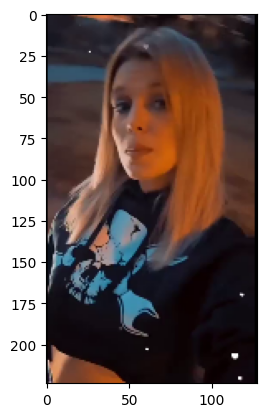

In [49]:
# first scene
first_scene = splitted_df[splitted_df['Id'] == sample_video['Id']].iloc[0]
print("First scene:", first_scene)

video_loaded, audio_loaded = load_video_audio(os.path.join(var.DOWNLOAD_PATH, sample_video['Set'], sample_video['Id'] + ".mp4"),
                                              start=first_scene['Start'], end=first_scene['End'])
print(f"Loaded Video Shape: {video_loaded.shape}")  # (num_frames, height, width, 3)
print(f"Loaded Audio Shape: {audio_loaded.shape}")

sample_frame = video_loaded[0]
plt.imshow(sample_frame)

In [50]:
import torch
from transformers import AutoProcessor, BlipForConditionalGeneration

device = 'cuda' if torch.cuda.is_available() else 'cpu'

blip_processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)
blip_model.eval()

def generate_captions(image, res_count=20, text='a picture of', bl_device='cuda'):
    # Preprocess the image and text
    inputs = blip_processor(images=image, text=text, return_tensors="pt")
    inputs = {k: v.to(bl_device) for k, v in inputs.items()}

    # Set the number of captions you want to generate
    with torch.no_grad():
        output = blip_model.generate(**inputs, max_length=50, num_beams=res_count, num_return_sequences=res_count)

    # Decode and print the captions
    captions = [blip_processor.decode(output[i], skip_special_tokens=True) for i in range(res_count)]
    
    # Remove the prompt
    captions = [caption.removeprefix(text + " ") for caption in captions]
    return captions

def generate_captions_video(video_array, 
                            res_count_each=20, text='a picture of', 
                            bl_device='cuda',
                            verbose=False):
    res = []
    iterations = video_array
    if verbose:
        iterations = tqdm(video_array, desc="Generating captions")
    for image in iterations:
        res.extend(generate_captions(image, res_count=res_count_each, text=text, bl_device=bl_device))
    return res

candidate_captions = generate_captions_video(video_loaded, res_count_each=5, verbose=True) # Image.open("data/sample_image.jpg")
candidate_captions

Generating captions: 100%|██████████| 66/66 [04:52<00:00,  4.44s/it]


['a woman with blonde hair',
 'a woman with long blonde hair',
 'a girl with blonde hair',
 'a woman in a black shirt',
 'a girl with long blonde hair',
 'a woman with blonde hair',
 'a woman in a black shirt',
 'a girl with blonde hair',
 'a woman with long blonde hair',
 'a woman wearing a black shirt',
 'a woman with blonde hair',
 'a woman with long blonde hair',
 'a woman in a black shirt',
 'a girl with blonde hair',
 'a woman wearing a black shirt',
 'a woman with blonde hair',
 'a woman with long blonde hair',
 'a girl with blonde hair',
 'a woman in a black shirt',
 'a woman in a black jacket',
 'a woman with blonde hair',
 'a woman with long blonde hair',
 'a girl with blonde hair',
 'a woman in a black shirt',
 'a woman in a black jacket',
 'a woman with blonde hair',
 'a woman with long blonde hair',
 'a girl with blonde hair',
 'a woman with blonde hair and blue eyes',
 'a woman in a black shirt',
 'a woman with blonde hair',
 'a woman with long blonde hair',
 'a woman',
 

### Get best caption

In [51]:
# temporarily switch to another due to GPU memory issues of InternVideo2 model

In [52]:
video_for_xclip, _ = load_video_audio(os.path.join(var.DOWNLOAD_PATH, sample_video['Set'], sample_video['Id'] + ".mp4"),
                                              target_fps=None,
                                              start=first_scene['Start'], end=first_scene['End'])
video_for_xclip.shape

(393, 224, 128, 3)

In [53]:
def to_num_frames(video_array, target_frame=8):
    num_frames = video_array.shape[0]

    if num_frames == target_frame:
        return video_array

    indices = np.linspace(0, num_frames - 1, target_frame).astype(int)
    return video_array[indices]

video_for_xclip = to_num_frames(video_for_xclip)
video_for_xclip.shape

(8, 224, 128, 3)

In [54]:
from transformers import AutoProcessor, AutoModel


vid_processor = AutoProcessor.from_pretrained("microsoft/xclip-base-patch32")
vid_model = AutoModel.from_pretrained("microsoft/xclip-base-patch32")


inputs = vid_processor(
    text=candidate_captions,
    videos=list(video_for_xclip),
    return_tensors="pt",
    padding=True,
)

with torch.no_grad():
    outputs = vid_model(**inputs)

logits_per_video = outputs.logits_per_video  # this is the video-text similarity score
probs = logits_per_video.softmax(dim=1)  # we can take the softmax to get the label probabilities

candidate_captions[probs.argmax()], probs.max()

/home/datlinux/XAI-4-YoutubeEngagement/.venv/lib/python3.12/site-packages/transformers/image_processing_utils.py:42: UserWarning: The following named arguments are not valid for `VideoMAEImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


('a woman with blonde hair and a blue shirt', tensor(0.0411))

### Extract text

(854, 480, 3)


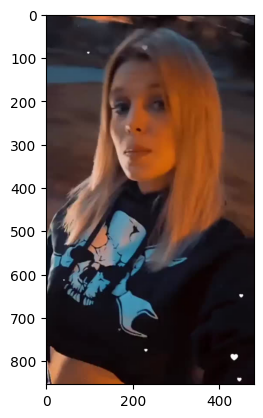

In [55]:
def extract_single_frame(video_path, start_s):
    out, _ = (
        ffmpeg
        .input(video_path, ss=start_s)
        .output('pipe:', vframes=1, format='image2pipe', pix_fmt='rgb24')
        .run(capture_stdout=True, capture_stderr=True)
    )
    
    # Decode the byte stream into an image (as RGB array)
    frame = np.frombuffer(out, np.uint8)
    # FFmpeg outputs raw RGB, so we assume width and height only if known.
    # Instead, decode using OpenCV (if ffmpeg outputs JPEG)
    frame = cv2.imdecode(frame, cv2.IMREAD_COLOR)  # BGR format
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Convert to RGB if needed
    return frame

imagee = extract_single_frame(os.path.join(var.DOWNLOAD_PATH, sample_video['Set'], sample_video['Id'] + ".mp4"), 
                              start_s=first_scene['Start'])

print(imagee.shape)
plt.imshow(imagee)

In [56]:
import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory
result = reader.readtext(imagee, detail = 0)
result

[]

## Audio processing

### Speech-to-text

In [59]:
audio_loaded

array([-2966,  -191,  4701, ..., -1375,  -121,  -358], dtype=int16)

In [61]:
import torch
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
from datasets import load_dataset


device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model_id = "openai/whisper-large-v3"

model = AutoModelForSpeechSeq2Seq.from_pretrained(
    model_id, torch_dtype=torch_dtype, low_cpu_mem_usage=True, use_safetensors=True
)
model.to(device)

processor = AutoProcessor.from_pretrained(model_id)

pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    torch_dtype=torch_dtype,
    device=device,
)

sample = audio_loaded.astype(np.float32) / 32768.0  # Convert to float32 and normalize

result = pipe(sample)
print(result["text"])


Device set to use cuda:0
/home/datlinux/XAI-4-YoutubeEngagement/.venv/lib/python3.12/site-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


 I remember when we were driving, driving in your car. Speeds were fast, it felt like I was drunk. City lights lay out before us and your heart felt nice right around my shoulder.


### Speaker diarization

# Train step

# Training

# Evaluate

# Infer